Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"

Необхідно виконати:

- Вивести перші рядки таблиці за допомогою методу head
- Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
- Замініть у таблиці значення "—" на значення NaN
- Визначте типи всіх стовпців за допомогою dataframe.dtypes
- Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
- Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
- Видаліть з таблиці дані по всій країні, останній рядок таблиці
- Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
- Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
- У якому регіоні була найвища народжуваність у 2014 році?
- Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'

In [2]:
all_tables = pd.read_html(data_url)
birth_rates = all_tables[8]

In [3]:
# first rows of the DataFrame
birth_rates.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [4]:
# number of rows and columns in the DataFrame
birth_rates.shape

(28, 9)

In [5]:
# replace all "-" with NaN
birth_rates = birth_rates.replace(to_replace="—", value=np.nan).copy()
birth_rates

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


In [6]:
# columns' types
birth_rates.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [7]:
# convert non-numeric types to numeric
birth_rates = birth_rates.astype({'2014': 'float64', '2019': 'float64'}).copy()

In [8]:
# number of NaNs in each column
birth_rates.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

In [9]:
# drop the last column
birth_rates = birth_rates.drop([27]).copy()

In [10]:
# fill NaNs with mean values
birth_rates = birth_rates.fillna(birth_rates[['1950', '1960', '1970', '2014', '2019']].mean())

In [11]:
# a list of regions with birth rate higher than average in 2019
birth_rates[(birth_rates[['2019']]>birth_rates[['2019']].mean()).all(axis=1)]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
2,Волинська,247.00,250.0,179.0,153,112,148,141.0,101.0
6,Закарпатська,314.00,273.0,207.0,168,115,151,146.0,104.0
8,Івано-Франківська,243.00,248.0,182.0,155,103,124,122.0,88.0
12,Львівська,234.00,240.0,171.0,140,91,119,119.0,87.0
14,Одеська,241.00,192.0,148.0,126,80,127,123.0,88.0
16,Рівненська,269.00,267.0,193.0,158,118,159,148.0,107.0
20,Херсонська,208.00,214.0,166.0,143,85,117,115.0,81.0
23,Чернівецька,247.00,218.0,170.0,148,101,128,129.0,92.0
25,Київ,231.04,174.0,159.0,120,73,120,121.0,110.0


In [12]:
# highest birth rate in 2014
birth_rates.iloc[birth_rates[['2014']].idxmax()]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
16,Рівненська,269.0,267.0,193.0,158,118,159,148.0,107.0


<AxesSubplot:xlabel='Регіон'>

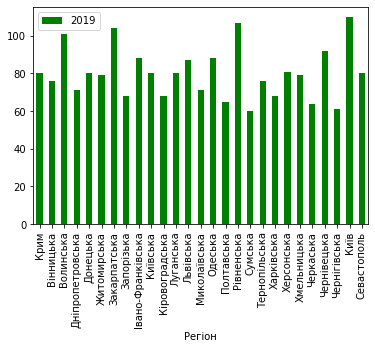

In [13]:
# bar diagram of birth rates in 2019 
birth_rates.plot.bar(x='Регіон', y='2019', color='green')

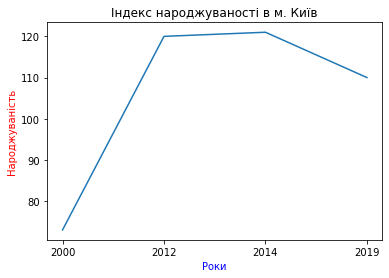

In [35]:
# plot birth rates in Kyiv since 2000
rates_in_region1_since_2000 = birth_rates.iloc[25, 5:]
plt.plot(['2000', '2012', '2014', '2019'], rates_in_region1_since_2000)
plt.xlabel('Роки', fontsize='medium', color='blue')
plt.ylabel('Народжуваність', fontsize='medium', color='red')
plt.title('Індекс народжуваності в м. Київ')
plt.show()

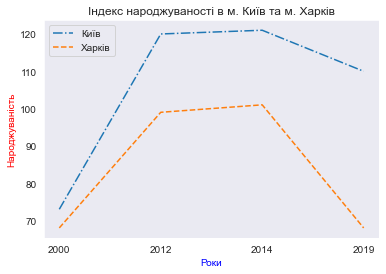

In [40]:
# comparison of two regions since 2000
years = ['2000', '2012', '2014', '2019']
rates_in_region2_since_2000 = birth_rates.iloc[19, 5:]
sns.set_style("dark")
fig, axs = plt.subplots()
axs.plot(years, rates_in_region1_since_2000, label='Київ', linestyle='-.')
axs.plot(years, rates_in_region2_since_2000, label='Харків', linestyle='--')
plt.xlabel('Роки', fontsize='medium', color='blue')
plt.ylabel('Народжуваність', fontsize='medium', color='red')
plt.title('Індекс народжуваності в м. Київ та м. Харків')
plt.legend()
plt.show()

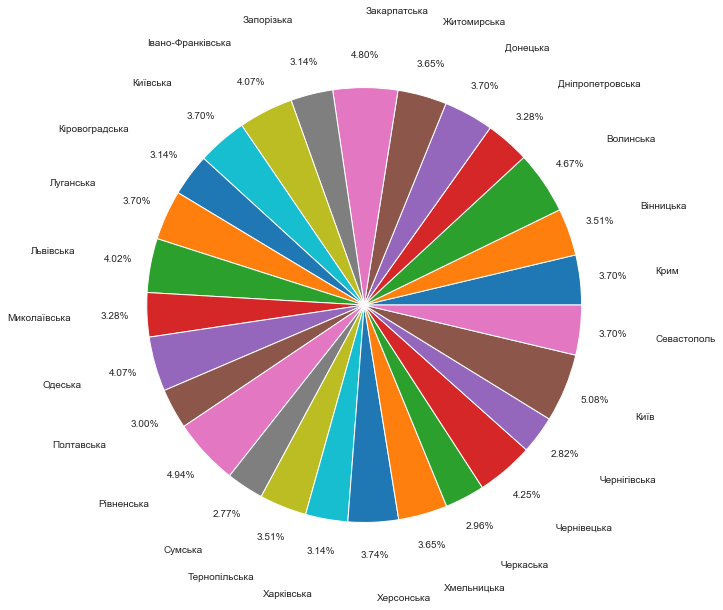

In [61]:
# distribution of rates among regions of the whole country in 2019
data = birth_rates['2019']
labels = list(birth_rates['Регіон'])

plt.figure(figsize=(12,10))

plt.pie(
    data,
    labels=labels,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)

plt.show()